## Testing

In [1]:
from MassProfile import MassProfile

In [2]:
MW = MassProfile("MW", 0)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
r = np.arange(0.25, 30.5, 1.5); print(r)

[ 0.25  1.75  3.25  4.75  6.25  7.75  9.25 10.75 12.25 13.75 15.25 16.75
 18.25 19.75 21.25 22.75 24.25 25.75 27.25 28.75 30.25]


In [4]:
MW.MassEnclosed(1, r).value

array([0.00000000e+00, 9.08465500e+08, 4.06834550e+09, 9.16365200e+09,
       1.58783970e+10, 2.38570940e+10, 3.13618090e+10, 4.09599445e+10,
       5.35994645e+10, 6.39875700e+10, 7.53236395e+10, 8.76076730e+10,
       1.01392650e+11, 1.16244085e+11, 1.30424047e+11, 1.44801501e+11,
       1.58981462e+11, 1.73319418e+11, 1.86156431e+11, 1.99664918e+11,
       2.13133906e+11])

## Plotting Rotation Curves

In [5]:
def plot_rotation_curve(ax, MP, r, halo_mass, a, gal_name):
    # plotting the enclosed mass of each component
    ax.semilogy(r, MP.MassEnclosed(1, r), color = "blue", label = "Halo mass proifile")
    ax.semilogy(r, MP.MassEnclosed(2, r), color = "orange", label = "Disk mass profile")
    ax.semilogy(r, MP.MassEnclosed(3, r), color = "green", label = "Bulge mass profile")
    # plotting the total enclosed mass
    ax.semilogy(r, MP.MassEnclosedTotal(r), color = "red", label = "Total enclosed mass mass profile")
    # plotting the hernquist profile
    ax.semilogy(r, MP.HernquistMass(r, a, halo_mass), color = "purple", ls = "--", label = f"Hernquist mass profile")
    # plt.title("Mass distribution of the MW")
    ax.set_xlabel("Radius (kpc)")
    ax.set_ylabel("Enclosed Mass ($M_{\odot}$)")

    ax.text(0.05, 0.95, f"{gal_name}", transform=ax.transAxes, fontsize=12, verticalalignment='top')
    return ax

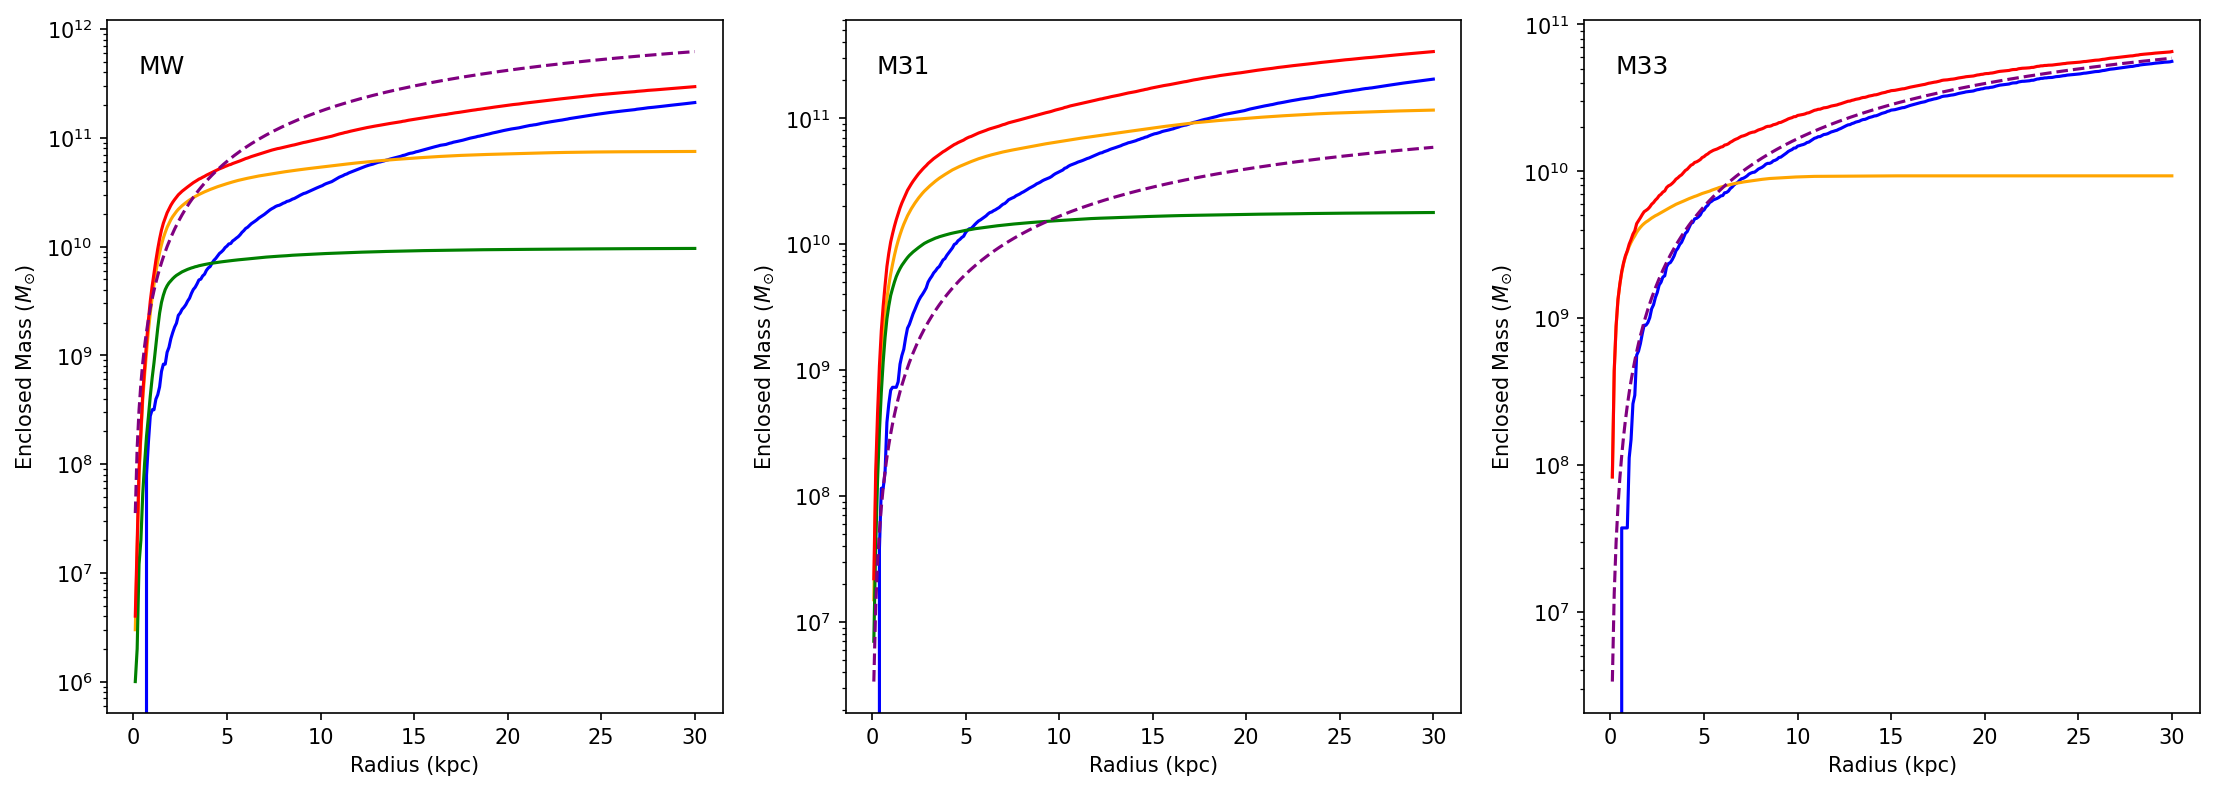

In [6]:
# rotation curve - MW (r 30kpc)
r = np.arange(0.1, 30.1, 0.1)
MW = MassProfile("MW", 0)
MW_halo = 1.975
a = 50

# rotation curve - M31
M31 = MassProfile("M31", 0)
M_halo = 1.921
a = 50

# rotation curve - M33
M33 = MassProfile("M33", 0)
M_halo = 0.187
a = 23.5

fig, ax = plt.subplots(1, 3, figsize = (18, 6), dpi=150)
ax = ax.flatten()

ax[0] = plot_rotation_curve(ax[0], MW, r, MW_halo, a, "MW")
ax[1] = plot_rotation_curve(ax[1], M31, r, M_halo, a, "M31")
ax[2] = plot_rotation_curve(ax[2], M33, r, M_halo, a, "M33")

# plt.legend(loc = "lower right", fontsize = 12)